# Content

<br>

- [Libraries](#Libraries)
<br>
<br>
- [Dataset](#Dataset)
<br>
<br>
- [Dictionary](#Dictionary)
<br>
<br>
- [Data Wrangling](#Data-Wrangling)
<br>
<br>
- [Visualization](#Visualization)
<br>
<br>
- [Simple models](#Simple-models)
<br>
<br>
- [Ensemble Model](#Ensemble-Model)
<br>
<br>
- [Results](#Results)


<br>


<a name="libraries">&nbsp;</a>
## <a class="anchor" id="#libraries">Libraries</a>

In [231]:
#Import libraries
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot
from matplotlib.ticker import FormatStrFormatter
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.basemap import Basemap
import datetime as dt


In [275]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [276]:
import plotly.express as px
import plotly.io as pio
from IPython.display import HTML

# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderers
pio.renderers.default = "plotly_mimetype+notebook"

from gitly.colab.plot import GitlyPlotter

# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')


In [263]:
import chart_studio.plotly as py
import plotly.offline as py

In [232]:
%matplotlib notebook
%matplotlib inline


In [222]:
#Import libraries Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree as trees
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO 
import pydotplus as pydotplus
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from imblearn.metrics import geometric_mean_score
import optuna
from vecstack import stacking
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RepeatedKFold
from eli5.sklearn import PermutationImportance
import eli5
from sklearn.feature_selection import RFE, f_regression
from sklearn.inspection import permutation_importance
import shap
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from optuna.samplers import TPESampler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer 
import time
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

In [4]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

## Dataset


This project develops the analysis of a dataset from the company Airbnb, the subject is the rental of properties in New York city and includes the published details of the property, costs and reviews

Source: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

## Data Load

General dataset analysis and stadistical measures

In [5]:
#Read dataframe
data = pd.read_csv('Airbnb_Open_Data.csv',dtype='unicode')
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,FALSE,strict,Private room,2020,$966,$193,10,9,10/19/2021,0.21,4,6,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,FALSE,moderate,Entire home/apt,2007,$142,$28,30,45,5/21/2022,0.38,4,2,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,US,TRUE,flexible,Private room,2005,$620,$124,3,0,NaN,NaN,5,1,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,TRUE,moderate,Entire home/apt,2005,$368,$74,30,270,7/5/2019,4.64,4,1,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,FALSE,moderate,Entire home/apt,2009,$204,$41,10,9,11/19/2018,0.1,3,1,289,"Please no smoking in the house, porch or on th...",NaN


In [6]:
#check shape
data.shape

(102599, 26)

In [7]:
#Total records per column
data.count()

id                                102599
NAME                              102349
host id                           102599
host_identity_verified            102310
host name                         102193
neighbourhood group               102570
neighbourhood                     102583
lat                               102591
long                              102591
country                           102067
country code                      102468
instant_bookable                  102494
cancellation_policy               102523
room type                         102599
Construction year                 102385
price                             102352
service fee                       102326
minimum nights                    102190
number of reviews                 102416
last review                        86706
reviews per month                  86720
review rate number                102273
calculated host listings count    102280
availability 365                  102151
house_rules     

In [8]:
#Data type of each column
data.dtypes

id                                object
NAME                              object
host id                           object
host_identity_verified            object
host name                         object
neighbourhood group               object
neighbourhood                     object
lat                               object
long                              object
country                           object
country code                      object
instant_bookable                  object
cancellation_policy               object
room type                         object
Construction year                 object
price                             object
service fee                       object
minimum nights                    object
number of reviews                 object
last review                       object
reviews per month                 object
review rate number                object
calculated host listings count    object
availability 365                  object
house_rules     

In [9]:
#Main stadistical measures
data.describe().T

,count,unique,top,freq
id,102599,102058,6044940,2
NAME,102349,61281,Home away from home,33
host id,102599,102057,38729751923,2
host_identity_verified,102310,2,unconfirmed,51200
host name,102193,13190,Michael,881
neighbourhood group,102570,7,Manhattan,43792
neighbourhood,102583,224,Bedford-Stuyvesant,7937
lat,102591,21991,40.76411,36
long,102591,17774,-73.99371,44
country,102067,1,United States,102067


In [10]:
data.describe()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
count,102599,102349,102599,102310,102193,102570,102583,102591,102591,102067,102468,102494,102523,102599,102385,102352,102326,102190,102416,86706,86720,102273,102280,102151,50468,2
unique,102058,61281,102057,2,13190,7,224,21991,17774,1,1,2,3,4,20,1151,231,153,476,2477,1016,5,78,438,1976,1
top,6044940,Home away from home,38729751923,unconfirmed,Michael,Manhattan,Bedford-Stuyvesant,40.76411,-73.99371,United States,US,FALSE,moderate,Entire home/apt,2014,$206,$41,1,0,6/23/2019,0.03,5,1,0,#NAME?,41662/AL
freq,2,33,2,51200,881,43792,7937,36,44,102067,102468,51474,34343,53701,5243,137,526,25421,15734,2443,1666,23369,63429,23544,2712,2


In [11]:
#Column list
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license'], dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              102599 non-null  object
 1   NAME                            102349 non-null  object
 2   host id                         102599 non-null  object
 3   host_identity_verified          102310 non-null  object
 4   host name                       102193 non-null  object
 5   neighbourhood group             102570 non-null  object
 6   neighbourhood                   102583 non-null  object
 7   lat                             102591 non-null  object
 8   long                            102591 non-null  object
 9   country                         102067 non-null  object
 10  country code                    102468 non-null  object
 11  instant_bookable                102494 non-null  object
 12  cancellation_policy           

## Dictionary

This section shows the information in each column of the dataset and the data type


**'id':** Airbnb's unique identifier for the listing -> Integer  
**'NAME':** Name of the listing -> Text  
**'host id':** Airbnb's unique identifier for the host/user -> Integer  
**'host_identity_verified':** If host was verified or not -> Boolean  
**'host name':** Name of the host. Usually just the first name(s) -> Text  
**'neighbourhood group':** The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. -> Text  
**'neighbourhood':** neighbourhood name -> Text  
**'lat':** Uses the World Geodetic System (WGS84) projection for latitude and longitude -> Float  
**'long':** Uses the World Geodetic System (WGS84) projection for latitude and longitude -> Float  
**'country':** Country Name -> Text  
**'country code':** Country code -> Text  
**'instant_bookable':** Whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing -> Boolean  
**'cancellation_policy':** Alternatives of cancellation policy -> Text  
**'room type':** All homes are grouped into the following room types: Entire home/apt-Private Room-Shared Room -> Text  
**'Construction year':** Construction year of the property -> Integer  
**'price':** Price -> Float  
**'service fee':** Fee -> Float  
**'minimum nights':** Minimum number of night stay for the listing (calendar rules may be different) -> Integer  
**'number of reviews':** The number of reviews the listing has -> Integer  
**'last review':** The date of the last/newest review -> Date  
**'reviews per month':** The number of reviews the listing has over the lifetime of the listing -> Float  
**'review rate number':** Review score -> Integer  
**'calculated host listings count':** The number of listings the host has in the current scrape, in the city/region geography -> Integer  
**'availability 365':** avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host -> Integer  
**'house_rules':** Rules requests from the host -> Text  
**'license':** The licence/permit/registration number -> Text  



## Data Wrangling

Here I'll remove the unnecesary rows and columns and replace nulls, also all other neccesary changes to have the correct data for the models

In [13]:
#Remove unnecesary columns
data=data.drop(columns=['NAME','host id','host_identity_verified','host name','country','calculated host listings count','license','house_rules','last review','id'])

In [14]:
#Column list
data.columns

Index(['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365'], dtype='object')

In [15]:
#Show first 5 records
data.head(5)

,neighbourhood group,neighbourhood,lat,long,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,Brooklyn,Kensington,40.64749,-73.97237,US,FALSE,strict,Private room,2020,$966,$193,10,9,0.21,4,286
1,Manhattan,Midtown,40.75362,-73.98377,US,FALSE,moderate,Entire home/apt,2007,$142,$28,30,45,0.38,4,228
2,Manhattan,Harlem,40.80902,-73.9419,US,TRUE,flexible,Private room,2005,$620,$124,3,0,NaN,5,352
3,Brooklyn,Clinton Hill,40.68514,-73.95976,US,TRUE,moderate,Entire home/apt,2005,$368,$74,30,270,4.64,4,322
4,Manhattan,East Harlem,40.79851,-73.94399,US,FALSE,moderate,Entire home/apt,2009,$204,$41,10,9,0.1,3,289


In [16]:
#Replace text TRUE/FALSE with boolean value
data['instant_bookable']=data['instant_bookable'].replace(['FALSE'], False)
data['instant_bookable']=data['instant_bookable'].replace(['TRUE'], True)

In [17]:
data['price']

0           $966 
1           $142 
2           $620 
3           $368 
4           $204 
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [18]:
#Replace '$' sign and ',' to convert to number
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.replace('$', '',regex=True)
data['price']

0          966 
1          142 
2          620 
3          368 
4          204 
          ...  
102594     844 
102595     837 
102596     988 
102597     546 
102598    1032 
Name: price, Length: 102599, dtype: object

In [19]:
#Replace '$' sign and ',' to convert to number
data['service fee'] = data['service fee'].str.replace(',', '')
data['service fee'] = data['service fee'].str.replace('$', '',regex=True)
data['service fee']

0         193 
1          28 
2         124 
3          74 
4          41 
          ... 
102594    169 
102595    167 
102596    198 
102597    109 
102598    206 
Name: service fee, Length: 102599, dtype: object

In [20]:
#Count null values
data.isna().sum()

neighbourhood group       29
neighbourhood             16
lat                        8
long                       8
country code             131
instant_bookable         105
cancellation_policy       76
room type                  0
Construction year        214
price                    247
service fee              273
minimum nights           409
number of reviews        183
reviews per month      15879
review rate number       326
availability 365         448
dtype: int64

In [21]:
data['country code'].unique()

array(['US', nan], dtype=object)

In [22]:
#List all records with missing country
null=data[data['country code'].isnull()]
null

,neighbourhood group,neighbourhood,lat,long,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
16,Brooklyn,Williamsburg,40.70837,-73.95352,NaN,NaN,moderate,Entire home/apt,2009,778,NaN,2,148,1.2,3,197
17,Brooklyn,Fort Greene,40.69169,-73.97185,NaN,NaN,flexible,Entire home/apt,2006,656,NaN,2,198,1.72,5,96
18,manhatan,Chelsea,40.74192,-73.99501,NaN,NaN,moderate,Private room,2008,460,NaN,1,260,2.12,3,325
19,Brooklyn,Crown Heights,40.67592,-73.94694,NaN,NaN,moderate,Entire home/apt,2004,1095,NaN,3,53,4.44,5,345
20,Manhattan,East Harlem,40.79685,-73.94872,NaN,NaN,moderate,Entire home/apt,2013,281,56,7,0,NaN,3,347
21,Brooklyn,Williamsburg,40.71842,-73.95718,NaN,NaN,flexible,Entire home/apt,2016,477,95,3,9,0.07,3,193
22,Brooklyn,Park Slope,40.68069,-73.97706,NaN,NaN,moderate,Private room,2013,133,27,2,130,1.09,4,54
23,Brooklyn,Park Slope,40.67989,-73.97798,NaN,NaN,moderate,Private room,2017,1050,210,1,39,0.37,3,9
24,Brooklyn,Park Slope,40.68001,-73.97865,NaN,NaN,strict,Private room,2005,816,163,2,71,0.61,4,344
25,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,NaN,NaN,strict,Entire home/apt,2006,1175,235,2,88,0.73,4,372


In [23]:
#List all records with missing neighbourhood group to complete according to neighbourhood
null2=data[data['neighbourhood group'].isnull()]
null2

,neighbourhood group,neighbourhood,lat,long,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
74,NaN,Washington Heights,40.83139,-73.94095,US,True,moderate,Private room,2011,571,114,2,49,1.6,2,NaN
75,NaN,Clinton Hill,40.68346,-73.96374,US,True,strict,Private room,2014,398,80,2,105,0.92,1,NaN
76,NaN,East Village,40.72828,-73.98801,US,False,strict,Entire home/apt,2018,618,124,5,21,0.2,4,NaN
77,NaN,Upper East Side,40.76865,-73.95058,US,False,strict,Private room,2007,116,23,1,142,1.5,4,NaN
78,NaN,Woodside,40.75038,-73.90334,US,True,flexible,Private room,2012,54,11,30,25,0.22,2,NaN
90,NaN,Williamsburg,40.71156,-73.96218,US,False,moderate,Private room,2015,266,53,3,174,1.54,5,NaN
91,NaN,Bushwick,40.70032,-73.9383,US,False,moderate,Private room,2012,728,146,4,24,0.28,5,NaN
92,NaN,Prospect Heights,40.68233,-73.97261,US,False,flexible,Entire home/apt,2021,583,117,4,166,3.4,2,NaN
148,NaN,East Village,40.72354,-73.98295,US,False,strict,Entire home/apt,2003,NaN,119,3,30,0.28,5,344
161,NaN,Williamsburg,40.71088,-73.95055,NaN,NaN,NaN,Private room,2022,1020,204,4,202,1.86,5,377


In [24]:
#Check 'neighbourhood group' from 'neighbourhood' 'Washington Heights'
data[data['neighbourhood'] == 'Washington Heights']['neighbourhood group'].unique()

array([nan, 'Manhattan'], dtype=object)

In [25]:
#Replace neighbourhood for all lines with Washington Heights for Manhattan
data.loc[data["neighbourhood"] == "Washington Heights", "neighbourhood group"] = "Manhattan"

In [26]:
#Check 'neighbourhood group' from 'neighbourhood' 'Clinton Hill'
data[data['neighbourhood'] == 'Clinton Hill']['neighbourhood group'].unique()

array(['Brooklyn', nan], dtype=object)

In [27]:
#Replace neighbourhood for all lines with Clinton Hill for Brooklyn

data.loc[data["neighbourhood"] == "Clinton Hill", "neighbourhood group"] = "Brooklyn"

In [28]:
#Check 'neighbourhood group' from 'neighbourhood' 'East Village'
data[data['neighbourhood'] == 'East Village']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [29]:
#Replace neighbourhood for all lines with East Village for Manhattan

data.loc[data["neighbourhood"] == "East Village", "neighbourhood group"] = "Manhattan"

In [30]:
#Check 'neighbourhood group' from 'neighbourhood' 'Upper East Side'
data[data['neighbourhood'] == 'Upper East Side']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [31]:
#Replace neighbourhood for all lines with Upper East Side for Manhattan

data.loc[data["neighbourhood"] == "Upper East Side", "neighbourhood group"] = "Manhattan"

In [32]:
#Check 'neighbourhood group' from 'neighbourhood' 'Woodside'
data[data['neighbourhood'] == 'Woodside']['neighbourhood group'].unique()

array([nan, 'Queens'], dtype=object)

In [33]:
#Replace neighbourhood for all lines with Woodside for Queens

data.loc[data["neighbourhood"] == "Woodside", "neighbourhood group"] = "Queens"

In [34]:
#Check 'neighbourhood group' from 'neighbourhood' 'Williamsburg'
data[data['neighbourhood'] == 'Williamsburg']['neighbourhood group'].unique()

array(['Brooklyn', nan], dtype=object)

In [35]:
#Replace neighbourhood for all lines with Williamsburg for Brooklyn

data.loc[data["neighbourhood"] == "Williamsburg", "neighbourhood group"] = "Brooklyn"

In [36]:
#Check 'neighbourhood group' from 'neighbourhood' 'Bushwick'
data[data['neighbourhood'] == 'Bushwick']['neighbourhood group'].unique()

array(['Brooklyn', nan], dtype=object)

In [37]:
#Replace neighbourhood for all lines with Bushwick for Brooklyn

data.loc[data["neighbourhood"] == "Bushwick", "neighbourhood group"] = "Brooklyn"

In [38]:
#Check 'neighbourhood group' from 'neighbourhood' 'Prospect Heights'
data[data['neighbourhood'] == 'Prospect Heights']['neighbourhood group'].unique()

array(['Brooklyn', nan], dtype=object)

In [39]:
#Replace neighbourhood for all lines with Prospect Heights for Brooklyn

data.loc[data["neighbourhood"] == "Prospect Heights", "neighbourhood group"] = "Brooklyn"

In [40]:
#Check 'neighbourhood group' from 'neighbourhood' 'Chelsea'
data[data['neighbourhood'] == 'Chelsea']['neighbourhood group'].unique()

array(['manhatan', 'Manhattan', nan], dtype=object)

In [41]:
#Replace neighbourhood for all lines with Chelsea for Manhattan

data.loc[data["neighbourhood"] == "Chelsea", "neighbourhood group"] = "Manhattan"

In [42]:
#Check 'neighbourhood group' from 'neighbourhood' 'East Harlem'
data[data['neighbourhood'] == 'East Harlem']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [43]:
#Replace neighbourhood for all lines with East Harlem for Manhattan

data.loc[data["neighbourhood"] == "East Harlem", "neighbourhood group"] = "Manhattan"

In [44]:
#Check 'neighbourhood group' from 'neighbourhood' 'Eastchester'
data[data['neighbourhood'] == 'Eastchester']['neighbourhood group'].unique()

array([nan, 'Bronx'], dtype=object)

In [45]:
#Replace neighbourhood for all lines with Eastchester for Bronx

data.loc[data["neighbourhood"] == "Eastchester", "neighbourhood group"] = "Bronx"

In [46]:
#Check 'neighbourhood group' from 'neighbourhood' 'Harlem'
data[data['neighbourhood'] == 'Harlem']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [47]:
#Replace neighbourhood for all lines with Harlem for Manhattan

data.loc[data["neighbourhood"] == "Harlem", "neighbourhood group"] = "Manhattan"

In [48]:
#Check 'neighbourhood group' from 'neighbourhood' 'Chinatown'
data[data['neighbourhood'] == 'Chinatown']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [49]:
#Replace neighbourhood for all lines with Chinatown for Manhattan

data.loc[data["neighbourhood"] == "Chinatown", "neighbourhood group"] = "Manhattan"

In [50]:
#Check 'neighbourhood group' from 'neighbourhood' 'Queens Village'
data[data['neighbourhood'] == 'Queens Village']['neighbourhood group'].unique()

array([nan, 'Queens'], dtype=object)

In [51]:
#Replace neighbourhood for all lines with Queens Village for Queens

data.loc[data["neighbourhood"] == "Queens Village", "neighbourhood group"] = "Queens"

In [52]:
#Check 'neighbourhood group' from 'neighbourhood' 'Bedford-Stuyvesant'
data[data['neighbourhood'] == 'Bedford-Stuyvesant']['neighbourhood group'].unique()

array(['Brooklyn', nan], dtype=object)

In [53]:
#Replace neighbourhood for all lines with Bedford-Stuyvesant for Brooklyn

data.loc[data["neighbourhood"] == "Bedford-Stuyvesant", "neighbourhood group"] = "Brooklyn"

In [54]:
#Check 'neighbourhood group' from 'neighbourhood' 'Upper West Side'
data[data['neighbourhood'] == 'Upper West Side']['neighbourhood group'].unique()

array(['Manhattan', nan], dtype=object)

In [55]:
#Replace neighbourhood for all lines with Upper West Side for Manhattan

data.loc[data["neighbourhood"] == "Upper West Side", "neighbourhood group"] = "Manhattan"

In [56]:
#Remove null rows, quantity is not relevant for the analysis

data=data.dropna(subset=['neighbourhood','Construction year','availability 365'])

In [57]:
#Fill rows without country code
data['country code'] = data['country code'].fillna('US')

In [58]:
#Remove rows without price
data = data[data['price'].notna()]

In [59]:
#Replace null
data['cancellation_policy'] = data['cancellation_policy'].fillna('Sin Datos')

In [60]:
#Replace null
data['minimum nights'] = data['minimum nights'].fillna('1')
data['number of reviews'] = data['number of reviews'].fillna('0')
data['review rate number'] = data['review rate number'].fillna('0')
data['service fee'] = data['service fee'].fillna('0')
data['reviews per month'] = data['reviews per month'].fillna('0')

In [61]:
#Change data type in each column

#data['id'] = data['id'].astype('int')
data['neighbourhood group'] = data['neighbourhood group'].astype('string')
data['neighbourhood'] = data['neighbourhood'].astype('string')
data['lat'] = data['lat'].astype('float')
data['long'] = data['long'].astype('float')
data['country code'] = data['country code'].astype('string')
data['instant_bookable'] = data['instant_bookable'].astype('bool')
data['cancellation_policy'] = data['cancellation_policy'].astype('string')
data['room type'] = data['room type'].astype('string')
data['Construction year'] = data['Construction year'].astype('int')
data['price'] = data['price'].astype('float')
data['service fee'] = data['service fee'].astype('float')
data['minimum nights'] = data['minimum nights'].astype('int')
data['number of reviews'] = data['number of reviews'].astype('int')
data['reviews per month'] = data['reviews per month'].astype('float')
data['review rate number'] = data['review rate number'].astype('int')
data['availability 365'] = data['availability 365'].astype('int')


In [62]:
#Data type of each column
data.dtypes

neighbourhood group     string
neighbourhood           string
lat                    float64
long                   float64
country code            string
instant_bookable          bool
cancellation_policy     string
room type               string
Construction year        int32
price                  float64
service fee            float64
minimum nights           int32
number of reviews        int32
reviews per month      float64
review rate number       int32
availability 365         int32
dtype: object

In [63]:
#Count null values
data.isna().sum()

neighbourhood group    0
neighbourhood          0
lat                    7
long                   7
country code           0
instant_bookable       0
cancellation_policy    0
room type              0
Construction year      0
price                  0
service fee            0
minimum nights         0
number of reviews      0
reviews per month      0
review rate number     0
availability 365       0
dtype: int64

In [64]:
location=data[['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country code']]

In [65]:
location = location[location['lat'].notna()]

In [66]:
#Remove unnecesary columns
data=data.drop(columns=['lat','long','country code'])

In [67]:
#Count null values
data.isna().sum()

neighbourhood group    0
neighbourhood          0
instant_bookable       0
cancellation_policy    0
room type              0
Construction year      0
price                  0
service fee            0
minimum nights         0
number of reviews      0
reviews per month      0
review rate number     0
availability 365       0
dtype: int64

In [68]:
data.head(5)

,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,Brooklyn,Kensington,False,strict,Private room,2020,966.0,193.0,10,9,0.21,4,286
1,Manhattan,Midtown,False,moderate,Entire home/apt,2007,142.0,28.0,30,45,0.38,4,228
2,Manhattan,Harlem,True,flexible,Private room,2005,620.0,124.0,3,0,0.00,5,352
3,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005,368.0,74.0,30,270,4.64,4,322
4,Manhattan,East Harlem,False,moderate,Entire home/apt,2009,204.0,41.0,10,9,0.10,3,289


## Data Profiling

Exploratory analysis with Pandas profiling

profile = pandas_profiling.ProfileReport(data)
profile

## Visualization

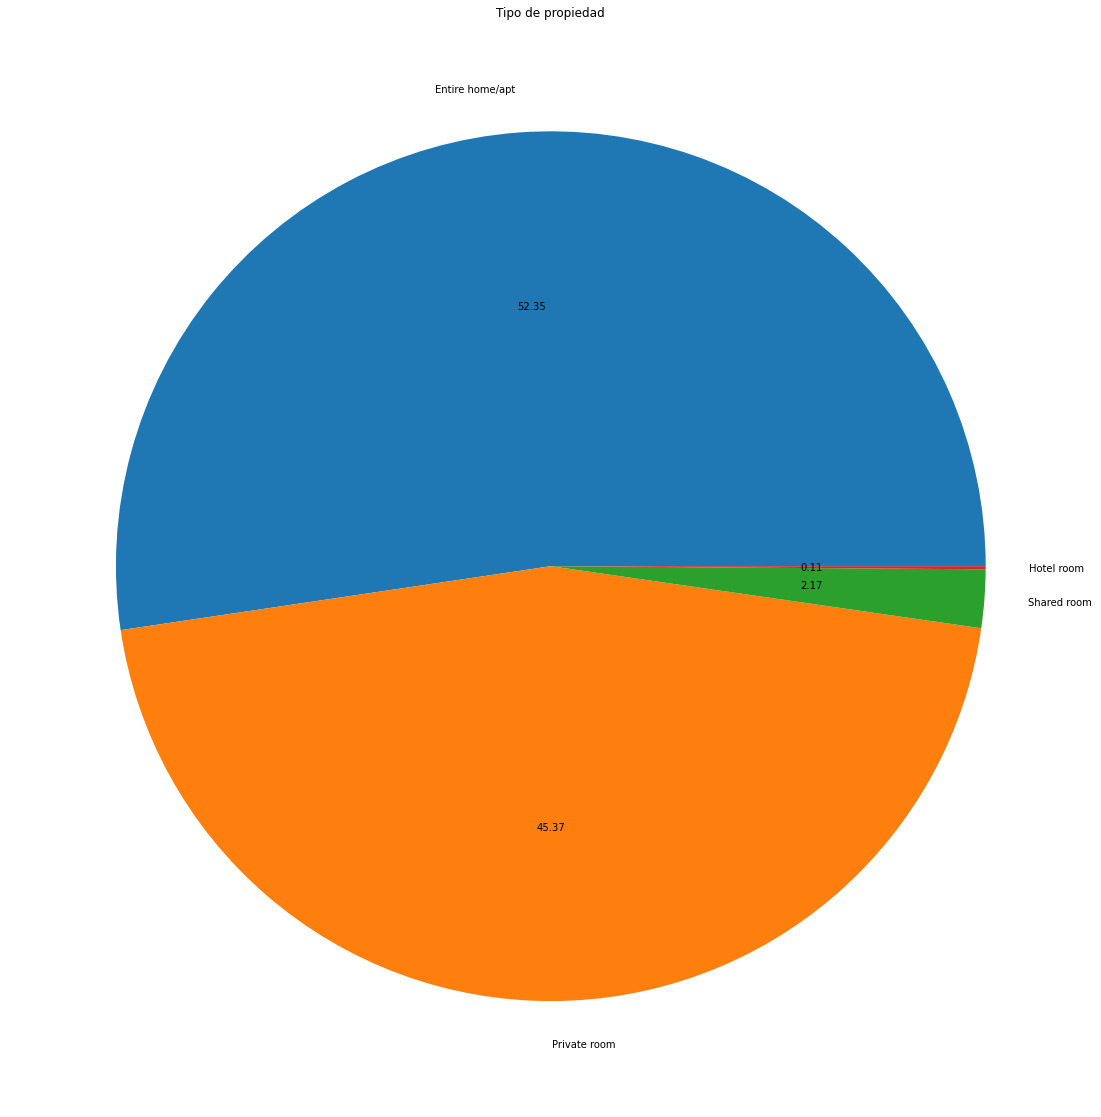

In [69]:
# Distribucion por tipo de propiedad
data['room type'].value_counts().plot(kind="pie",title='Tipo de propiedad',figsize=[20,20],autopct="%.2f", label='')
plt.show()

The plot shows that almost the complete records are from complete department or private room. Shared room and hotel are insignificant


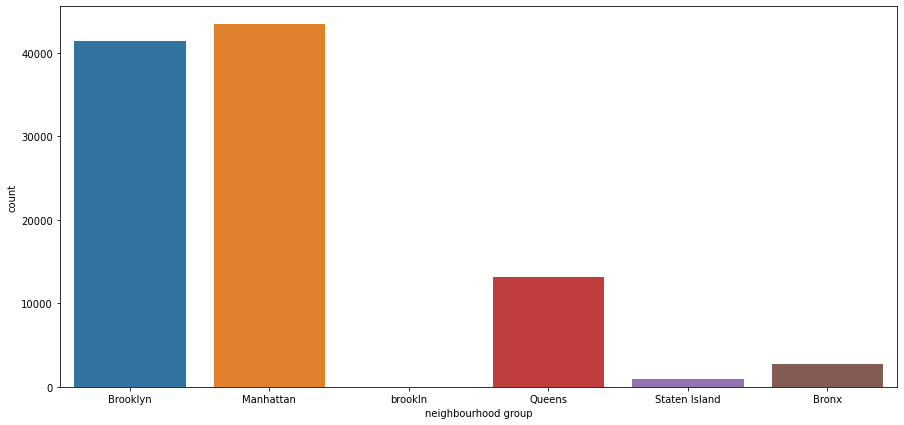

In [70]:
countplt, ax = plt.subplots(figsize = (15,7))
sns.countplot(x='neighbourhood group', data=data)
plt.show()

The plot shows that most of the adds are concentrated in Brooklyn and Manhattan


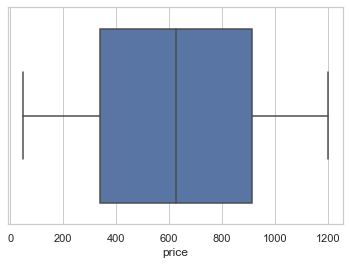

In [71]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["price"])
plt.show()

There aren't outliers, most of the values are concentrated in the same range and max and min are not so far apart


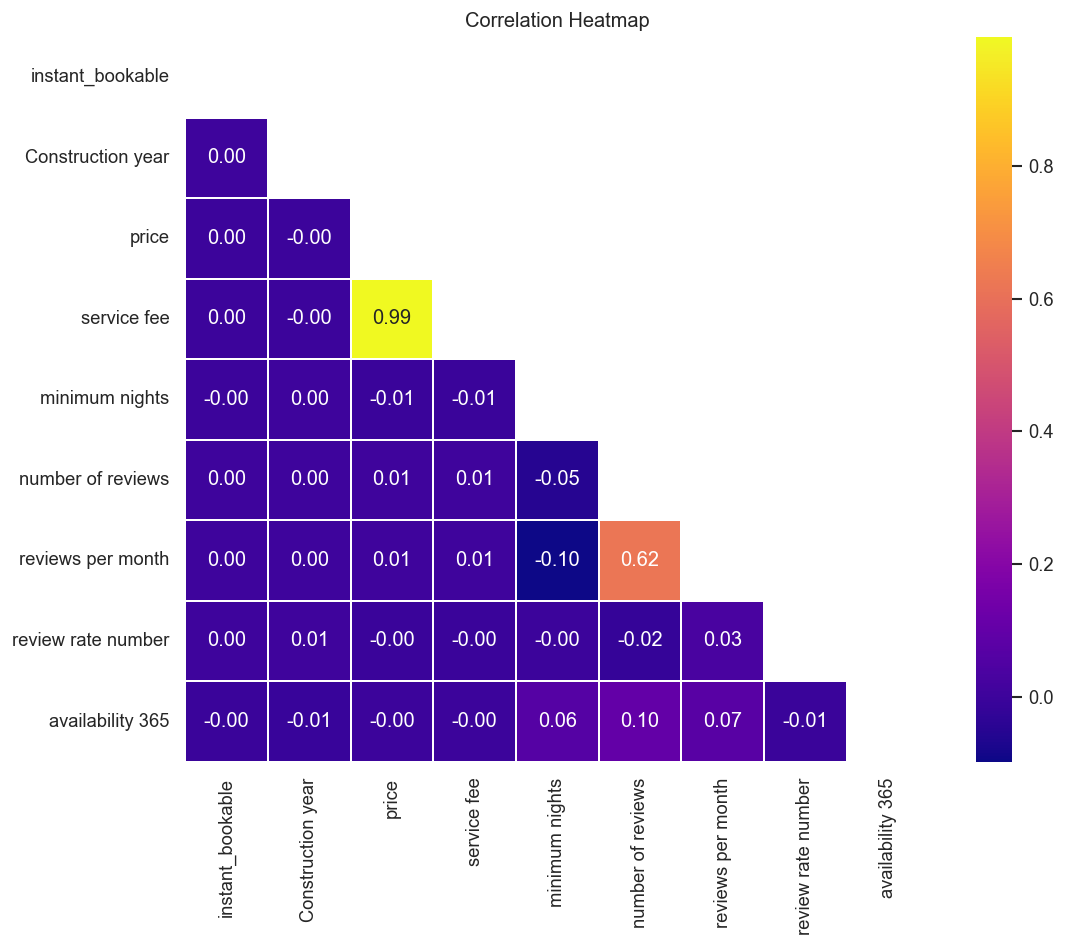

In [72]:
#Correlaciones
plt.figure(dpi = 120,figsize= (10,8))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In the heatmap we can see a direct relation between price and service fee. At the same time there is a dependency between number of reviews and reviews per month since the last one is the total divided by quantity of months


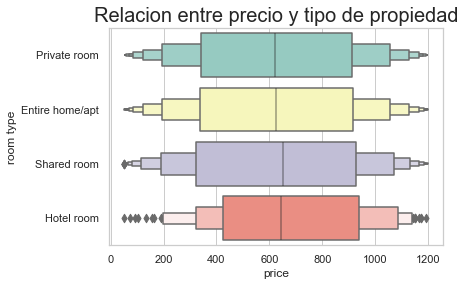

In [73]:
# Relacion entre precio y tipo de propiedad
sns.boxenplot(x=data['price'], y=data['room type'], palette = 'Set3')
plt.title('Relacion entre precio y tipo de propiedad', fontsize = 20, fontweight = 30)
plt.show()

The visual shows that the price distribution is almost the same for all property types, only hotel has a small difference in the minimum value.


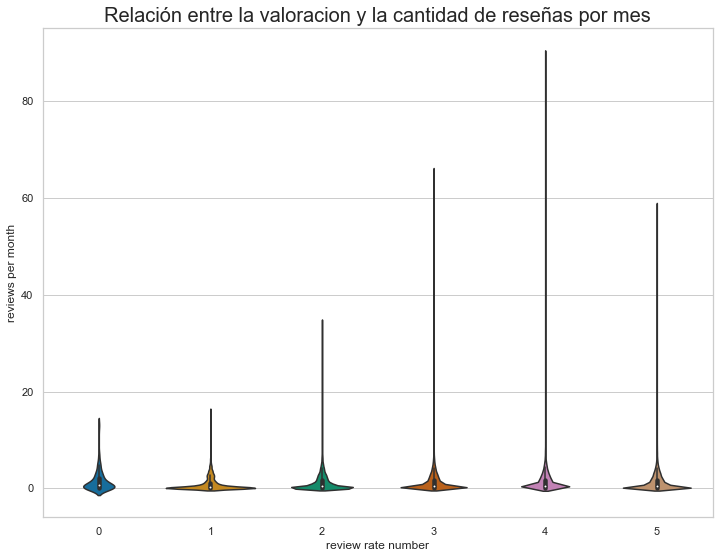

In [74]:
# valoracion vs cantidad de reseñas por mes
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=data['review rate number'], y=data['reviews per month'], palette = 'colorblind')
plt.title('Relación entre la valoracion y la cantidad de reseñas por mes', fontsize = 20, fontweight = 30)
plt.show()

This plot shows that the rate is similar in comparison with the number of reviews, the maximum for good reviews is significantly higher that for bad reviews


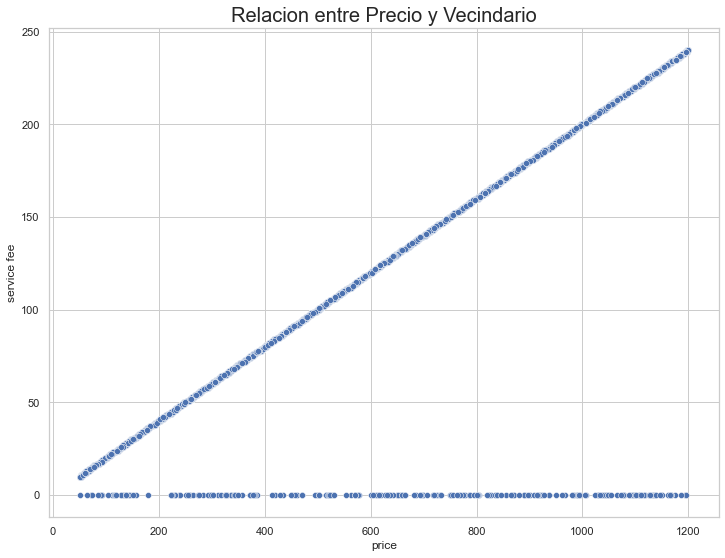

In [75]:
sns.scatterplot(x="price", y="service fee", data=data)
plt.title('Relacion entre Precio y Vecindario', fontsize = 20, fontweight = 30)
plt.show()

This plot shows the direct relation between price and service fee, the only exception are the missing values from service fee


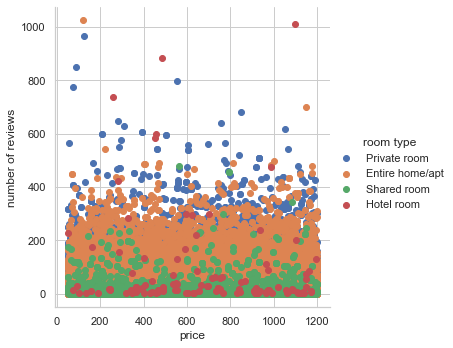

In [76]:
sns.FacetGrid(data,hue = 'room type' , height = 5).map(plt.scatter,'price','number of reviews').add_legend();
plt.show()

Here we can see that the hotel rooms receive the least quantity of reviews, followed by shared rooms, this is because there aren't many adds for this type. Price doesn't seems to have an effect in the quantity of reviews


<Figure size 2400x1800 with 0 Axes>

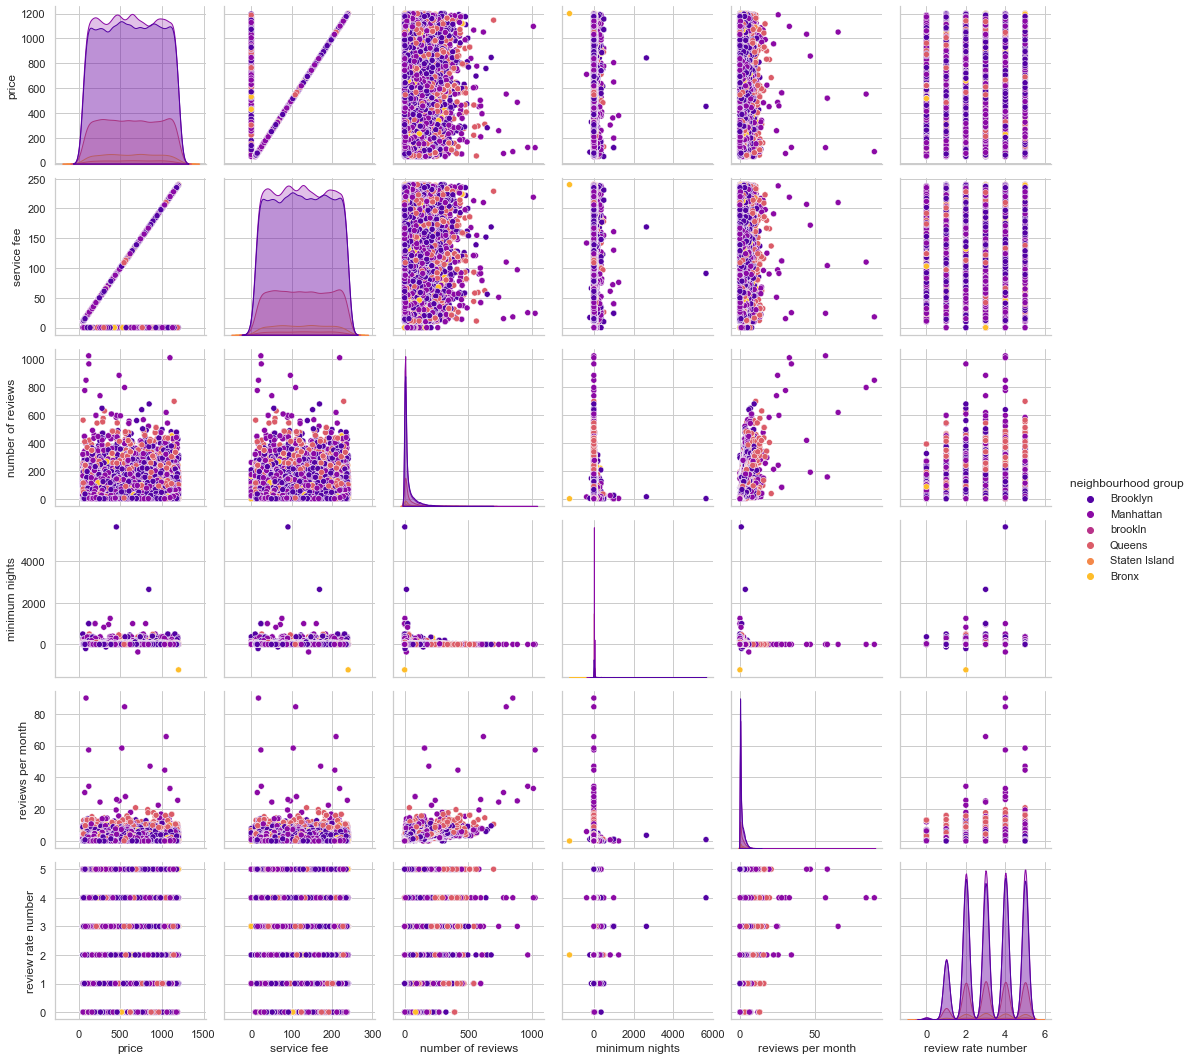

In [77]:
#Create Pairplot with atributte hue = 'neighbourhood group'.
data2=data[['price','room type', 'neighbourhood group', 'service fee', 'number of reviews','cancellation_policy','minimum nights','reviews per month','review rate number']]
plt.figure(dpi = 120,figsize= (20,15))
sns.pairplot(data=data2,hue = 'neighbourhood group',palette = 'plasma')
plt.show()

This visual shows the direct relation between price and service fee, same for number of reviews and reviews per month. Minimun night shows that most records don't require it


## Machine Learning

## Simple models

In [78]:
#Split X and y

X = data.drop(["price","service fee"], axis=1) #Elimino de mi dataset la variable a predecir
y = data.price #Defino el Target

In [79]:
#Use label Encoder for categorical variables
le = preprocessing.LabelEncoder()
for column_name in X.columns:
    if X[column_name].dtype == 'string':
        X[column_name] = le.fit_transform(X[column_name])
    else:
        pass

In [80]:
X

,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,1,111,False,3,2,2020,10,9,0.21,4,286
1,2,130,False,2,0,2007,30,45,0.38,4,228
2,2,97,True,1,2,2005,3,0,0.00,5,352
3,1,42,True,2,0,2005,30,270,4.64,4,322
4,2,62,False,2,0,2009,10,9,0.10,3,289
...,...,...,...,...,...,...,...,...,...,...,...
102594,1,217,False,1,2,2003,1,0,0.00,3,227
102595,2,133,True,2,2,2016,1,1,0.02,2,395
102596,1,154,True,2,2,2009,3,0,0.00,5,342
102597,3,120,True,3,0,2015,2,5,0.10,3,386


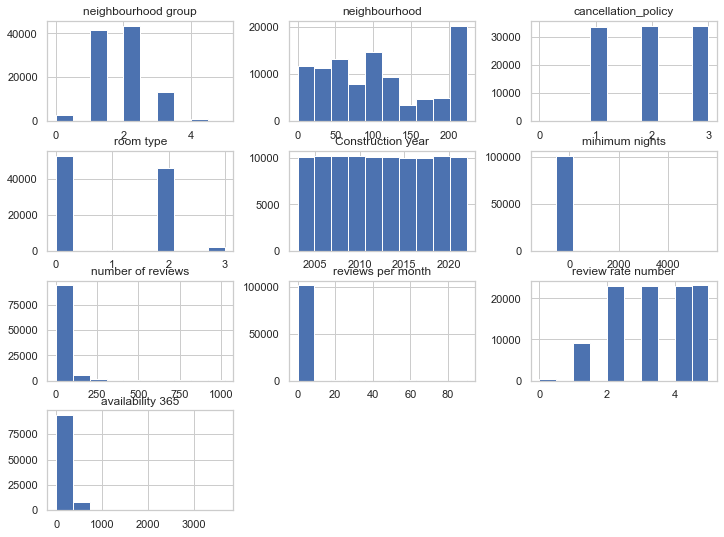

In [81]:
# histograms of the variables to evaluate data skew
X.hist()
pyplot.show()

In [82]:
#Transform scale of features

PT = PowerTransformer(method='yeo-johnson', standardize=True)
 
X_T=pd.DataFrame(PT.fit_transform(X),
            columns=X.columns, index=X.index) 
X_T

,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,reviews per month,review rate number,availability 365
0,-0.889402,0.195957,-0.996182,1.197462,1.028354,1.301994,0.130084,0.124121,-0.661184,0.559668,1.001230
1,0.464090,0.436762,-0.996182,0.053251,-0.952079,-0.951277,0.946573,1.043569,-0.313742,0.559668,0.794824
2,0.464090,0.006567,1.003832,-1.248694,1.028354,-1.300122,-0.197467,-1.499806,-1.246403,1.346083,1.205104
3,-0.889402,-0.898050,1.003832,0.053251,-0.952079,-1.300122,0.946573,1.977360,1.641144,0.559668,1.115841
4,0.464090,-0.529280,-0.996182,0.053251,-0.952079,-0.603019,0.130084,0.124121,-0.940887,-0.217425,1.011129
...,...,...,...,...,...,...,...,...,...,...,...
102594,-0.889402,1.380167,-0.996182,-1.248694,1.028354,-1.649555,-0.302844,-1.499806,-1.246403,-0.217425,0.790979
102595,0.464090,0.473312,1.003832,0.053251,1.028354,0.611292,-0.302844,-0.978382,-1.180687,-0.982978,1.324758
102596,-0.889402,0.719554,1.003832,0.053251,1.028354,-0.603019,-0.197467,-1.499806,-1.246403,1.346083,1.175922
102597,1.616818,0.312132,1.003832,1.197462,-0.952079,0.438255,-0.248965,-0.210208,-0.940887,-0.217425,1.300447


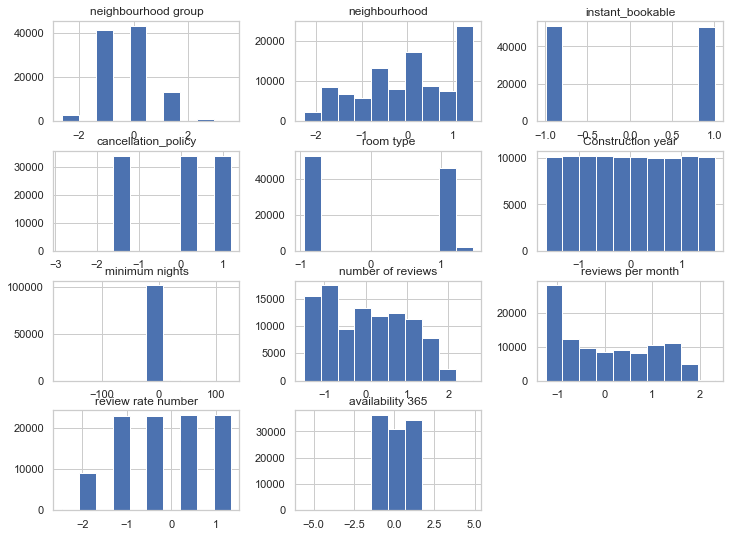

In [83]:
# histograms of the variables
X_T.hist()
pyplot.show()

In [84]:
#Split 30% for test and 70% for train
X_train, X_test, y_train, y_test = train_test_split(X_T, y, test_size=0.30, random_state=42) 

In [85]:
results = pd.DataFrame(columns=['Algorithm','Accuracy'])

In [186]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Property')

    plt.show()
    plt.close()

## Random Forest


In [86]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [87]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [88]:
# Predicting the target values of the test set
y_pred_RF = regressor.predict(X_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF)), '.2f'))
print("\nRMSE: ", rmse)


RMSE:  298.88


We use Optuna to optimize the parameters of the model

In [89]:
def objective(trial):
    
    tree_method:'gpu_hist'
    #criterion = trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    max_depth = trial.suggest_int('max_depth', 1, 1000)
    max_features = trial.suggest_categorical('max_features', [1.0, 'sqrt','log2'])
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 100)
    n_estimators =  trial.suggest_int('n_estimators', 10, 500)
    
 
    
    regr = RandomForestRegressor(bootstrap = bootstrap, 
                                 max_depth = max_depth, max_features = max_features,
                                 n_estimators = n_estimators,n_jobs=1, random_state = 0)
    

    regr.fit(X_train, y_train)

    preds = regr.predict(X_test)
    
    rmse = float(format(np.sqrt(mean_squared_error(y_test, preds)), '.2f'))
    
    
    return rmse

In [90]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-10-08 08:15:46,928] A new study created in memory with name: no-name-c1282ec3-e7e0-48e7-bce5-e13c0a5591fe
[I 2022-10-08 08:16:32,805] Trial 0 finished with value: 293.59 and parameters: {'bootstrap': 'False', 'max_depth': 842, 'max_features': 'sqrt', 'n_estimators': 202}. Best is trial 0 with value: 293.59.
[I 2022-10-08 08:18:32,769] Trial 1 finished with value: 293.46 and parameters: {'bootstrap': 'True', 'max_depth': 145, 'max_features': 'log2', 'n_estimators': 469}. Best is trial 1 with value: 293.46.
[I 2022-10-08 08:19:19,096] Trial 2 finished with value: 293.68 and parameters: {'bootstrap': 'True', 'max_depth': 52, 'max_features': 'log2', 'n_estimators': 217}. Best is trial 1 with value: 293.46.
[I 2022-10-08 08:20:51,218] Trial 3 finished with value: 293.36 and parameters: {'bootstrap': 'True', 'max_depth': 512, 'max_features': 'sqrt', 'n_estimators': 413}. Best is trial 3 with value: 293.36.
[I 2022-10-08 08:21:49,169] Trial 4 finished with value: 293.46 and parameters

Number of finished trials: 10
Best trial: {'bootstrap': 'True', 'max_depth': 191, 'max_features': 1.0, 'n_estimators': 325}


In [91]:
#Create an instance with tuned hyperparameters
optimized_rf = RandomForestRegressor(bootstrap = study.best_params['bootstrap'], 
                                     max_depth = study.best_params['max_depth'], max_features = study.best_params['max_features'],
                                     n_estimators = study.best_params['n_estimators'],
                                     n_jobs=1, random_state = 0)

In [92]:
optimized_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap='True', max_depth=191, n_estimators=325,
                      n_jobs=1, random_state=0)

In [93]:
# Predicting the target values of the test set
y_pred_RF = optimized_rf.predict(X_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_RF)), '.2f'))
print("\nRMSE: ", rmse)


RMSE:  284.06


In [94]:
#Cross Validation
scores_rf = cross_val_score(optimized_rf, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_rf)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_rf.mean(), scores_rf.std()))
scores_rf=-scores_rf.mean()

[-286.81527782 -245.24420623 -325.8675339  -264.18988637 -186.3086238 ]
Mean score of 261.69 with a standard deviation of 46.28


In [95]:
#Calculation of Feature Importance
columns = X_T.columns
coefficients = optimized_rf.feature_importances_
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestRegressor - Feature Importance:')
print('\n',fullList,'\n')

RandomForestRegressor - Feature Importance:

                Variable  absCoefficient
10     availability 365        0.171540
8     reviews per month        0.170730
1         neighbourhood        0.141111
5     Construction year        0.124834
7     number of reviews        0.122944
6        minimum nights        0.085475
9    review rate number        0.063431
3   cancellation_policy        0.036917
0   neighbourhood group        0.035067
4             room type        0.027829
2      instant_bookable        0.020122 



In [96]:
#Calculation of Permutation Feature Importance
perm = PermutationImportance(optimized_rf, random_state=1).fit(X_T, y)
eli5.show_weights(perm, feature_names = X_T.columns.tolist())

Weight,Feature
0.4724 ± 0.0019,reviews per month
0.4487 ± 0.0020,availability 365
0.4248 ± 0.0016,neighbourhood
0.4013 ± 0.0026,Construction year
0.3992 ± 0.0026,number of reviews
0.2460 ± 0.0015,minimum nights
0.2211 ± 0.0011,review rate number
0.1033 ± 0.0012,room type
0.0724 ± 0.0007,neighbourhood group
0.0626 ± 0.0005,cancellation_policy


Analyzing the importance of each feature from the trained model we see 'availability 365' and 'reviews per month' at the top, followed by 'neighbourhood', 'Construction year' and 'number of reviews'. The least important features are 'room type' and 'instant_bookable'. But when we shuffle the values the importance change and we can see at the top 'neighbourhood' and 'reviews per month'. 'instant_bookable' is still at the bottom showing that is the least important feature.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


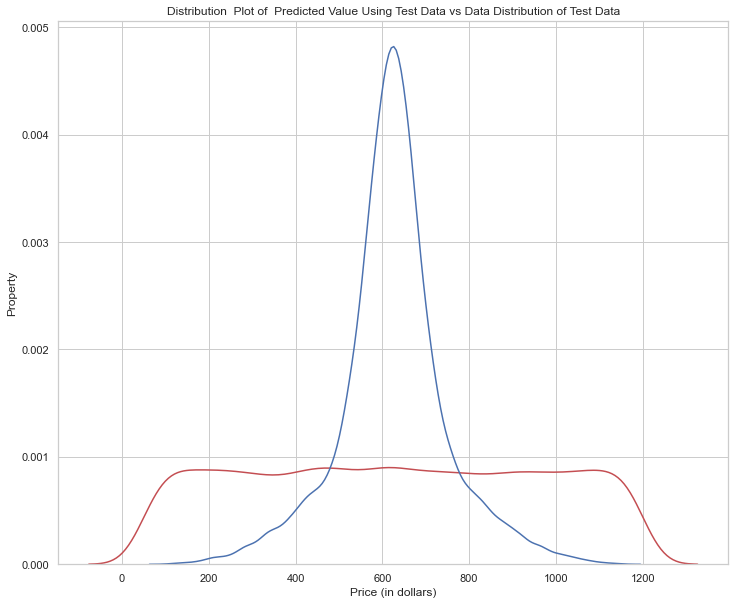

In [192]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_pred_RF,"Actual Values (Test)","Predicted Values (Test)",Title)

In [97]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Random Forest Regression', 'Accuracy': scores_rf }])])

## XGboost


In [98]:
RegModel_XG=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:squarederror', booster='gbtree')

In [99]:
#Creating the model on Training Data
RegModel_XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [100]:
prediction_XG=RegModel_XG.predict(X_test)

In [101]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, prediction_XG)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  331.682


We use Optuna to optimize the parameters of the model

In [102]:
def objective(trial,data=X_T,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.30,random_state=42)
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators' : trial.suggest_int('estimators', 0, 500),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = float(format(np.sqrt(mean_squared_error(y_test, preds)), '.2f'))
    
    
    return rmse

In [103]:

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)



[I 2022-10-08 09:01:51,492] A new study created in memory with name: no-name-e0e97024-16b1-4681-8e53-e56ebb69a344
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2022-10-08 09:02:32,566] Trial 0 finished with value: 330.15 and parameters: {'lambda': 0.18982161011388107, 'alpha': 0.024229380078119853, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.012, 'estimators': 310, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 288}. Best is trial 0 with 

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2022-10-08 09:05:00,360] Trial 9 finished with value: 329.43 and parameters: {'lambda': 0.3039313564018784, 'alpha': 0.006535349352355298, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.018, 'estimators': 365, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 150}. Best is trial 1 with value: 326.47.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
[I 2022-10-08 09:08:33,268] Trial 18 finished with value: 328.45 and parameters: {'lambda': 0.0012533907535788467, 'alpha': 0.27350584908974707, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'estimators': 438, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 191}. Best is trial 15 with value: 317.82.
suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Number of finished trials: 20
Best trial: {'lambda': 0.0011889439480007498, 'alpha': 0.6598874473094107, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.02, 'estimators': 487, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 1}


In [104]:
#Create an instance with tuned hyperparameters
optimized_XG = XGBRegressor(max_depth = study.best_params['max_depth'], reg_alpha = study.best_params['alpha'],
                                     reg_lambda = study.best_params['lambda'], min_child_weight = study.best_params['min_child_weight'],
                                     learning_rate = study.best_params['learning_rate'], colsample_bytree = study.best_params['colsample_bytree'], subsample = study.best_params['subsample'], n_estimators = study.best_params['estimators'], 
                                     random_state=2020)

In [105]:
#Creating the model on Training Data
optimized_XG.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=487, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2020,
             reg_alpha=0.6598874473094107, reg_lambda=0.0011889439480007498, ...)

In [106]:
prediction_XG=optimized_XG.predict(X_test)

In [107]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, prediction_XG)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  317.817


In [108]:
#Cross Validation
scores_XG = cross_val_score(optimized_XG, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_XG)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_XG.mean(), scores_XG.std()))
scores_XG=-scores_XG.mean()

[-317.74554095 -311.92265311 -329.95119092 -311.42643416 -298.54271019]
Mean score of 313.92 with a standard deviation of 10.18


In [109]:
columns = X_T.columns
coefficients = optimized_XG.feature_importances_
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('XGBoost - Feature Importance:')
print('\n',fullList,'\n')

XGBoost - Feature Importance:

                Variable  absCoefficient
10     availability 365        0.129414
8     reviews per month        0.125777
7     number of reviews        0.114184
5     Construction year        0.099849
1         neighbourhood        0.098526
6        minimum nights        0.094066
9    review rate number        0.093821
4             room type        0.077595
0   neighbourhood group        0.064799
3   cancellation_policy        0.053045
2      instant_bookable        0.048924 



In [110]:
perm = PermutationImportance(optimized_XG, random_state=1).fit(X_T, y)
eli5.show_weights(perm, feature_names = X_T.columns.tolist())

Weight,Feature
0.1076 ± 0.0014,number of reviews
0.1042 ± 0.0007,reviews per month
0.1013 ± 0.0004,availability 365
0.0926 ± 0.0003,neighbourhood
0.0839 ± 0.0007,Construction year
0.0513 ± 0.0001,minimum nights
0.0473 ± 0.0005,review rate number
0.0296 ± 0.0003,room type
0.0272 ± 0.0003,neighbourhood group
0.0185 ± 0.0002,cancellation_policy


Analyzing the importance of each feature from the trained model we see 'reviews per month' and 'availability 365' at the top, but all of them have a similar importance. The least important features are 'cancellation_policy' and 'instant_bookable'. When we shuffle the values we find the same ones at the top and at the bottom but the percentage show greater variation.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


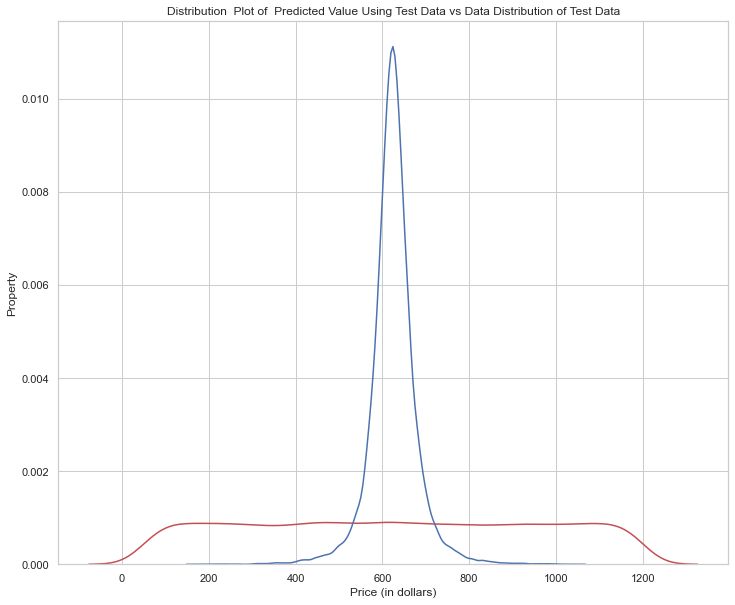

In [191]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,prediction_XG,"Actual Values (Test)","Predicted Values (Test)",Title)

In [111]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'XGboost', 'Accuracy': scores_XG }])])

## Simple Linear Regression

In [112]:
# create linear regression object
reg = linear_model.LinearRegression()

In [113]:
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [114]:
y_pred_SLR = reg.predict(X_test)

In [115]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred_SLR)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  332.353


In [116]:
#Cross Validation
scores_lr = cross_val_score(reg, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_lr)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_lr.mean(), scores_lr.std()))
scores_lr=-scores_lr.mean()

[-333.5248459  -332.17525774 -330.47834109 -330.99762815 -331.41109746]
Mean score of 331.72 with a standard deviation of 1.06


In [117]:
def rfe_select_featurs(X_T, y, estimator, num_features) -> list[str]:
    rfe_selector = RFE(estimator=estimator, 
                       n_features_to_select=num_features, 
                       step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X_T.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    
    return rfe_feature

In [118]:
# total list of features
colnames = X.columns
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [119]:
# Do FRE feature importance scoring - 
# stop the search when only the last feature is left
rfe = RFE(reg, n_features_to_select=1, verbose =3 )
rfe.fit(X_T, y)
ranks["RFE_LR"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [120]:
# all ranks
# Put the mean scores into a Pandas dataframe
rfe_lr_df = pd.DataFrame(list(ranks['RFE_LR'].items()), columns= ['Feature','rfe_importance'])

rfe_lr_df


,Feature,rfe_importance
0,neighbourhood group,0.2
1,neighbourhood,0.9
2,instant_bookable,0.1
3,cancellation_policy,0.4
4,room type,0.0
5,Construction year,0.5
6,minimum nights,1.0
7,number of reviews,0.3
8,reviews per month,0.8
9,review rate number,0.6


In [121]:
# Here's how you use permutation importance
def get_permutation_importance(X_T, y, model) -> pd.DataFrame:
    result = permutation_importance(model, X_T, y, n_repeats=1,
                                random_state=0)
    
    # permutational importance results
    result_df = pd.DataFrame(colnames,  columns=['Feature'])
    result_df['permutation_importance'] = result.get('importances')
    
    return result_df

In [122]:
permutate_df = get_permutation_importance(X_T, y, reg)
permutate_df.sort_values('permutation_importance', 
                   ascending=False)[
                                    ['Feature','permutation_importance'
                                    ]
                                  ][:30].style.background_gradient(cmap='Blues')

,Feature,permutation_importance
4,room type,0.000057
9,review rate number,0.000056
1,neighbourhood,0.000053
5,Construction year,0.000041
3,cancellation_policy,0.000033
10,availability 365,0.000013
6,minimum nights,0.000013
8,reviews per month,0.000012
2,instant_bookable,0.000007
7,number of reviews,0.000000


In [123]:
perm = PermutationImportance(reg, random_state=1).fit(X_T, y)
eli5.show_weights(perm, feature_names = X_T.columns.tolist())

Weight,Feature
0.0001 ± 0.0000,reviews per month
0.0000 ± 0.0000,review rate number
0.0000 ± 0.0001,neighbourhood
0.0000 ± 0.0001,Construction year
0.0000 ± 0.0000,minimum nights
0.0000 ± 0.0000,availability 365
0.0000 ± 0.0001,room type
0.0000 ± 0.0000,neighbourhood group
-0.0000 ± 0.0000,cancellation_policy
-0.0000 ± 0.0000,number of reviews


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


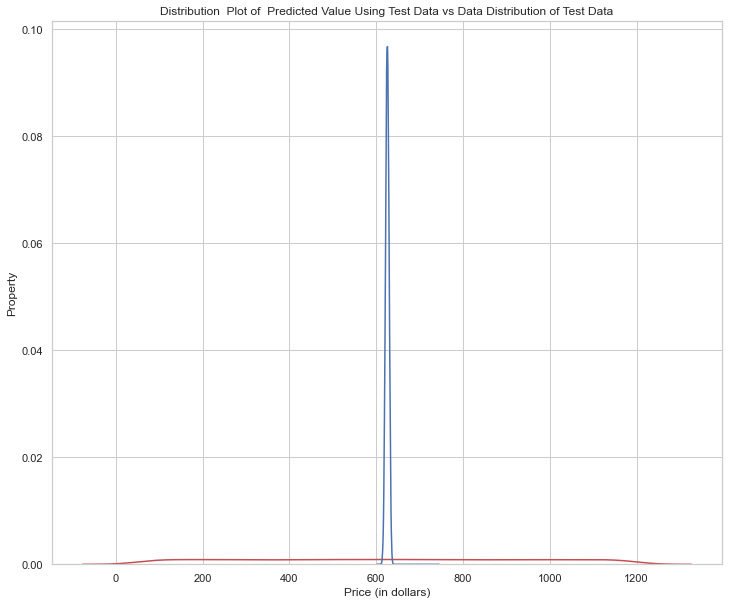

In [190]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_pred_SLR,"Actual Values (Test)","Predicted Values (Test)",Title)

Analyzing the importance of each feature from the trained model we see 'room type', 'review rate number' and 'neighbourhood' at the top. The least important features are 'number of reviews' and 'neighbourhood'. But when we shuffle the values the importance change and there is no significant variance.

In [124]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Simple Linear Regression', 'Accuracy': scores_lr }])])

## Ensemble Model


Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would.

### Stacking

Stacking is an ensemble learning technique that uses predictions from multiple models to build a new model. This model is used for making predictions on the test set. 

In [125]:
X_T2=X_T.copy()

In [126]:
y2=y.copy()

In [127]:
# get the dataset
def get_dataset():
    X_T2, y2 = make_regression(n_samples=1000, n_features=11, noise=0.1, random_state=1)
    return X_T2, y2

In [128]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rf', optimized_rf))
    level0.append(('XG', optimized_XG))
    level0.append(('lr', reg))
    # define meta learner model
    level1 = reg
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model


In [129]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['rf'] = optimized_rf
    models['XG'] = optimized_XG
    models['lr'] = reg
    models['stacking'] = get_stacking()
    return models

In [130]:
# evaluate a given model using cross-validation
def evaluate_model(model, X_T2, y2):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_T2, y2, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [131]:
# define dataset
X_T2, y2 = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results_2, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_T2, y2)
    results_2.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, -scores.mean(), scores.std()))

>rf 79.486 (7.419)
>XG 98.934 (8.739)
>lr 0.101 (0.007)
>stacking 0.102 (0.007)


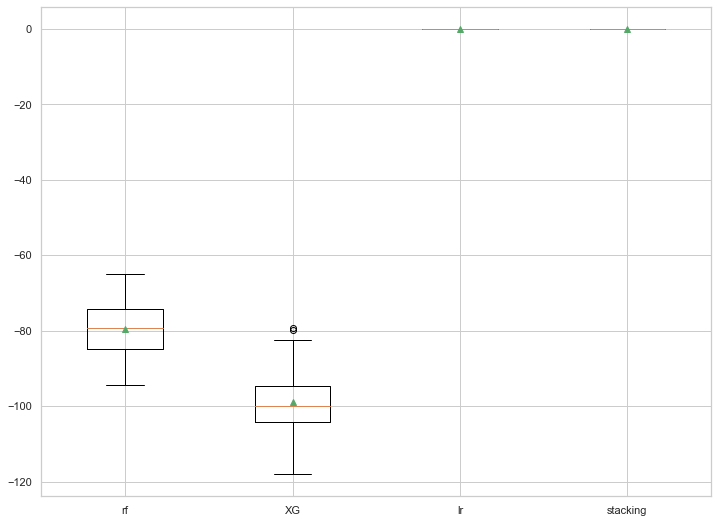

In [132]:
# plot model performance for comparison
pyplot.boxplot(results_2, labels=names, showmeans=True)
pyplot.show()

In [133]:
#Cross Validation
scores_stack = model_selection.cross_val_score(model, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_stack)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_stack.mean(), scores_stack.std()))
scores_stack=-scores_stack.mean()

[-281.50727089 -228.31622049 -330.9685074  -259.04880158 -146.06937776]
Mean score of 249.18 with a standard deviation of 61.48


In [134]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Ensemble Model - Stacking', 'Accuracy': scores_stack }])])

### Blending

It is similar to the stacking method, but rather than using the whole dataset for training the base-models, a validation dataset is kept separate to make predictions. 

In [135]:
 
# get the dataset
def get_dataset():
    X3, y3 = make_regression(n_samples=10000, n_features=11, noise=0.3, random_state=7)
    return X3, y3
 
# get a list of base models
def get_models():
    models = list()
    models.append(('lr', linear_model.LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    models.append(('cart', DecisionTreeRegressor()))
    models.append(('svm', SVR()))
    return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train3, X_val3, y_train3, y_val3):
    # fit all models on the training set and predict on hold out set
    meta_X = list()
    for name, model in models:
        # fit in training set
        model.fit(X_train3, y_train3)
        # predict on hold out set
        yhat = model.predict(X_val3)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store predictions as input for blending
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = np.hstack(meta_X)
    # define blending model
    blender = linear_model.LinearRegression()
    # fit on predictions from base models
    blender.fit(meta_X, y_val3)
    return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test3):
    # make predictions with base models
    meta_X = list()
    for name, model in models:
        # predict with base model
        yhat = model.predict(X_test3)
        # reshape predictions into a matrix with one column
        yhat = yhat.reshape(len(yhat), 1)
        # store prediction
        meta_X.append(yhat)
    # create 2d array from predictions, each set is an input feature
    meta_X = np.hstack(meta_X)
    # predict
    return blender.predict(meta_X)
 
# define dataset
X_T3, y3 = get_dataset()
# split dataset into train and test sets
X_train_full3, X_test3, y_train_full3, y_test3 = train_test_split(X_T, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train_full3, y_train_full3, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train3.shape, X_val3.shape, X_test3.shape))
# create the base models
models = get_models()

# train the blending ensemble
blender = fit_ensemble(models, X_train3, X_val3, y_train3, y_val3)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test3)
# evaluate predictions
score = mean_absolute_error(y_test3, yhat)
print('Blending MAE: %.3f' % score)

Train: (34068, 11), Val: (16781, 11), Test: (50850, 11)
Blending MAE: 280.983


In [136]:
#Cross Validation
scores_blend = model_selection.cross_val_score(blender, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_blend)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_blend.mean(), scores_blend.std()))
scores_blend=-scores_blend.mean()

[-333.5248459  -332.17525774 -330.47834109 -330.99762815 -331.41109746]
Mean score of 331.72 with a standard deviation of 1.06


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


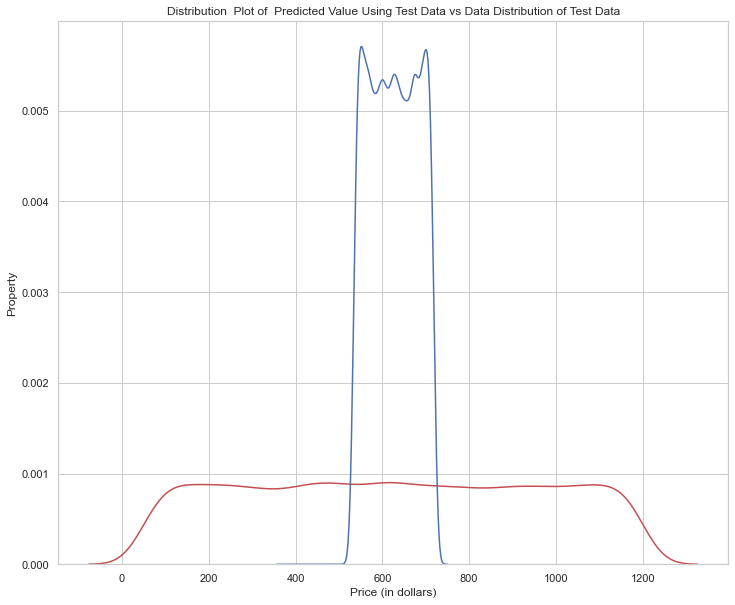

In [189]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat,"Actual Values (Test)","Predicted Values (Test)",Title)

In [137]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Ensemble Model - Blending', 'Accuracy': scores_blend }])])

### Bagging

Bagging, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model.

In [138]:
# initializing the bagging model using XGboost as base model with default parameters
model_bagging = BaggingRegressor(base_estimator=XGBRegressor(max_depth = study.best_params['max_depth'], reg_alpha = study.best_params['alpha'],
                                     reg_lambda = study.best_params['lambda'], min_child_weight = study.best_params['min_child_weight'],
                                     learning_rate = study.best_params['learning_rate'], colsample_bytree = study.best_params['colsample_bytree'], subsample = study.best_params['subsample'], n_estimators = study.best_params['estimators'], 
                                     random_state=2020))
 
# training model
model_bagging.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred = model_bagging.predict(X_test)
 

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred)), '.2f'))
print("\nRMSE: ", rmse)
 
#Cross Validation
scores_bagging = model_selection.cross_val_score(model_bagging, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_bagging)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_bagging.mean(), scores_bagging.std()))
scores_bagging=-scores_bagging.mean()


RMSE:  318.96
[-318.04141085 -312.18851137 -329.19320503 -311.04008773 -298.94636909]
Mean score of 313.88 with a standard deviation of 9.86


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


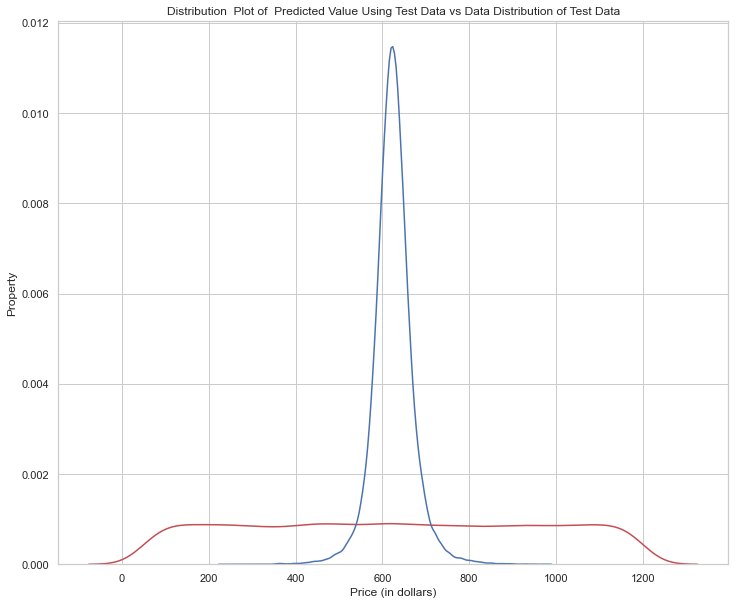

In [188]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,pred,"Actual Values (Test)","Predicted Values (Test)",Title)

In [139]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Ensemble Model - Bagging', 'Accuracy': scores_bagging }])])

### Boosting


The main idea of boosting is to add additional models to the overall ensemble model sequentially. Previously with bagging, we averaged each individual model created. This time with each iteration of boosting, a new model is created and the new base-learner model is trained (updated) from the errors of the previous learners.

In [140]:
# initializing the boosting module with default parameters
model_boost = GradientBoostingRegressor()
 
# training the model on the train dataset
model_boost.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = model_boost.predict(X_test)
 
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred_final)), '.2f'))
print("\nRMSE: ", rmse)
 



RMSE:  332.18


Optimize parameters with GridSearchCV

In [141]:
parameters = {
    'loss': ['squared_error', 'lad','huber','quantile'],
    'learning_rate': [0.1, 0.2,0.3],
    'max_depth': [3,5,6]
} 

In [142]:
optimized_boost = GridSearchCV(GradientBoostingRegressor(), parameters, verbose=1,cv=5,n_jobs=-1) 

In [143]:
optimized_boost.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'loss': ['squared_error', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 5, 6]},
             verbose=1)

In [144]:
optimized_boost.best_params_

{'learning_rate': 0.3, 'loss': 'squared_error', 'max_depth': 6}

In [145]:
predictions = optimized_boost.predict(X_test)

In [146]:
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, predictions)), '.2f'))
print("\nRMSE: ", rmse)
 


RMSE:  328.11


In [147]:
#Cross Validation
scores_boost = model_selection.cross_val_score(optimized_boost, X_T, y, cv=5, scoring='neg_root_mean_squared_error')
print(scores_boost)
print("Mean score of %0.2f with a standard deviation of %0.2f" % (-scores_boost.mean(), scores_boost.std()))
scores_boost=-scores_boost.mean()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[-329.6585706  -322.23074393 -337.48484963 -321.41292678 -325.38235036]
Mean score of 327.23 with a standard deviation of 5.89


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


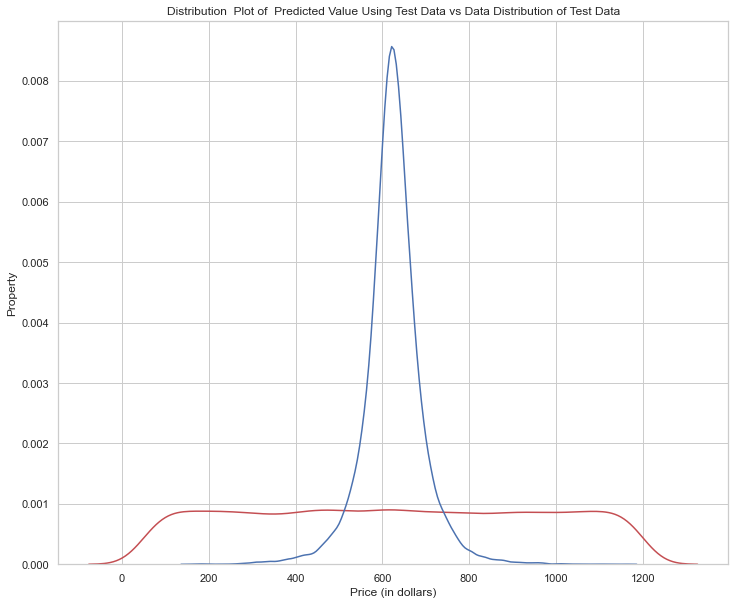

In [187]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,predictions,"Actual Values (Test)","Predicted Values (Test)",Title)

In [148]:
results = pd.concat([results, pd.DataFrame.from_records([{ 'Algorithm': 'Ensemble Model - Boosting', 'Accuracy': scores_boost }])])

## Results


In [149]:
results=results.reset_index(drop=True)

In [150]:
results

,Algorithm,Accuracy
0,Random Forest Regression,261.685106
1,XGboost,313.917706
2,Simple Linear Regression,331.717434
3,Ensemble Model - Stacking,249.182036
4,Ensemble Model - Blending,331.717434
5,Ensemble Model - Bagging,313.881917
6,Ensemble Model - Boosting,327.233888


In [151]:
# Application of all Machine Learning methods
models_sum = []
models_sum.append(('RF', optimized_rf))
models_sum.append(('XG', optimized_XG))
models_sum.append(('SLR', linear_model.LinearRegression()))
models_sum.append(('Stack', model))
models_sum.append(('Blend', blender))
models_sum.append(('Bagging', model_bagging))
models_sum.append(('Boosting', optimized_boost))

RF: -287.951592 (1.698362)
XG: -317.113291 (2.052215)
SLR: -331.448468 (1.882669)
Stack: -282.974784 (1.683077)
Blend: -331.448468 (1.882669)
Bagging: -317.865421 (1.803312)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Boosting: -327.929034 (2.177748)


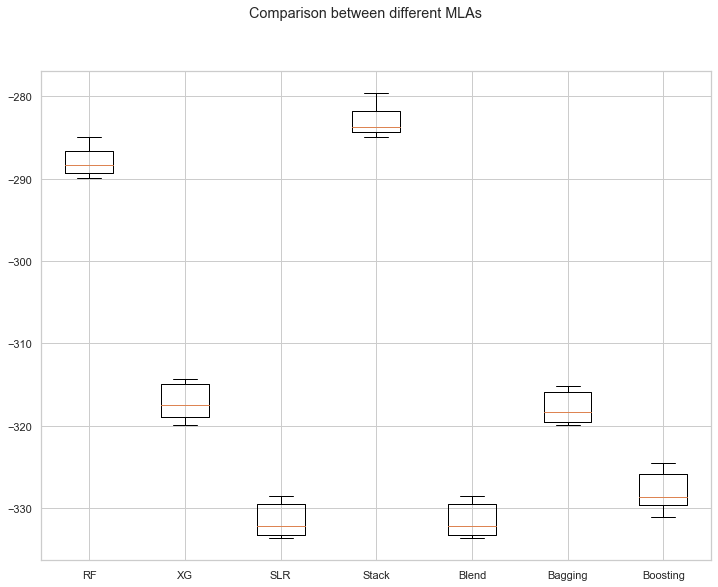

In [155]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models_sum:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = -model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [200]:
# Application of all Machine Learning methods
MLA = {
    
    #Random Forest    
    "RandomForestRegressor": optimized_rf,
    
    #Linear Regression
    "LinearRegression": linear_model.LinearRegression(),
    
    #Ensemble Methods
    "Stacking": model,
    "Blend": blender,
    "Bagging": model_bagging,
    "Boosting": optimized_boost,

    #XGBoost
    "XGBRegressor": optimized_XG,
      

  
    }

In [206]:
regressors = {
    "XGBRegressor": optimized_XG,
    "RandomForestRegressor": optimized_rf,
    "LinearRegression": LinearRegression(),
    "Stacking":model,
    "Blend": blender,
    "Bagging": model_bagging,
    "Boosting": optimized_boost,
    
}

In [207]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* RandomForestRegressor


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* LinearRegression


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* Stacking
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* Blend


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* Bagging


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


* Boosting
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [208]:
df_models.sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
1,RandomForestRegressor,31.58,284,288
0,XGBRegressor,4.83,318,317
5,Bagging,49.1,318,318
3,Stacking,138.54,328,328
6,Boosting,139.16,328,328
2,LinearRegression,0.02,332,331
4,Blend,0.01,332,331


In [214]:
#display data type of each column in DataFrame
df_models.dtypes

model       object
run_time    object
rmse        object
rmse_cv     object
dtype: object

In [218]:
df_models['run_time']=df_models['run_time'].astype(float)
df_models['rmse']=df_models['rmse'].astype(int)
df_models['rmse_cv']=df_models['rmse_cv'].astype(float)


In [291]:
# Create Bar charts
fig = go.FigureWidget(data=[
    go.Bar(name='Run Time', x=df_models.model, y=df_models.run_time),
    go.Bar(name='RMSE', x=df_models.model, y=df_models.rmse),
    go.Bar(name='RMSE CV', x=df_models.model, y=df_models.rmse_cv)
])
# Change the bar mode
fig.update_layout(barmode='group')


HTML(fig.to_html())

fig.show()

!figure.html(figure.html)



None of the models show an acceptable accuracy, it could be because the dataset is missing important features to determine the price. The best model is Random Forest, not only because it's accuracy but also for the smaller cost, but still not enough to generate an acceptable prediction 